<a href="https://colab.research.google.com/github/zzickso/Meachine-Learning/blob/main/clustering(k_means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2차원 입력 데이터

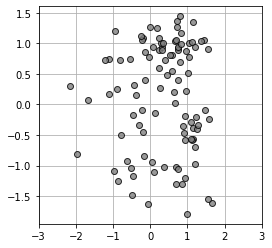

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#데이터 생성 --------------------------------------------------------
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N,3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3,3]
X_range1 = [-3,3]
X_col= ['cornflowerblue', 'black', 'white']
Mu= np.array([[-.5, -.5],[.5, 1.0],[1, -.5]]) #분포의 중심
Sig= np.array([[.7, .7],[.8, .3],[.3, .8]]) #분포의 분산
Pi = np.array([0.4, 0.8, 1]) #누적 확률
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k]= 1
            break
    for k in range(2):
        X[n,k] = (np.random.randn()*Sig[T3[n,:]==1,k]+Mu[T3[n,:]==1,k])

#데이터 그리기 -------------------------------------------------
def show_data(X):
    plt.plot(X[:, 0], X[:,1], linestyle='none',marker='o',markersize=6,markeredgecolor='black'
    ,color='gray',alpha=0.8)
    plt.grid(True)


#메인-----------------------------------------------------------------
plt.figure(1, figsize=(4,4))
show_data(X)
plt.xlim(X_range0)
plt.xlim(X_range1)
plt.show()
np.savez('data_ch9.npz', X=X, X_range0=X_range0,X_range1=X_range1)


# K-means

##### •Step 0:변수의 준비와 초기화

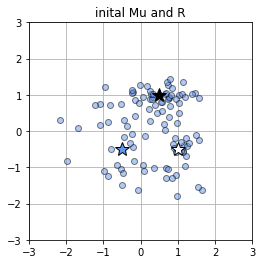

In [25]:
# 데이터를 그리는 함수 ---------------------------------------------
def show_prm(x, r, mu, col):
    for k in range(K):
        #데이터 분포의 묘사
        plt.plot(x[r[:,k]==1,0],x[r[:,k]==1,1],
                 marker='o',
                 markerfacecolor=X_col[k], markeredgecolor='k',
                 markersize=6, alpha=0.5, linestyle='none')
        #데이터의 평균을 '별표'로 묘사
        plt.plot(mu[k,0],mu[k,1],marker='*',
                 markerfacecolor=X_col[k],markersize=15,
                 markeredgecolor='k', markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid(True)

#-------------------------------------------------------------
plt.figure(figsize=(4,4))
R=np.c_[np.ones((N,1)), np.zeros((N,2))]
show_prm(X,R,Mu,X_col)
plt.title('inital Mu and R')
plt.show()

##### Step 1:R의 갱신

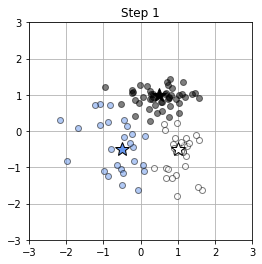

In [31]:
# r을 정한다
def step1_kmeans(x0,x1,mu):
    N= len(x0)
    r= np.zeros((N, K))
    for n in range(N):
        wk=np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k,0])**2+ (x1[n]-mu[k,1])**2
        r[n, np.argmin(wk)]=1
    return r

#-------------------------------------
plt.figure(figsize=(4,4))
R=step1_kmeans(X[:,0], X[:,1],Mu)
show_prm(X,R,Mu,X_col)
plt.title('Step 1')
plt.show()

##### Step 2: u의 갱신

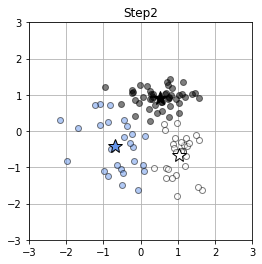

In [32]:
# Mu 결정 ----------------------------
def step2_kmeans(x0,x1,r):
    mu = np.zeros((K,2))
    for k in range(K):
        mu[k,0] =np.sum(r[:,k]*x0)/ np.sum(r[:,k])
        mu[k,1] =np.sum(r[:,k]*x1)/ np.sum(r[:,k])
    return mu

#--------------------------------------
plt.figure(figsize=(4,4))
Mu = step2_kmeans(X[:,0],X[:,1],R)
show_prm(X,R,Mu,X_col)

plt.title('Step2')
plt.show()